In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


In [40]:
postcode_path = "postcode_maps/postcode-XXNN/postcode-XXNN.shp"
postcode_gdf = gpd.read_file(postcode_path)

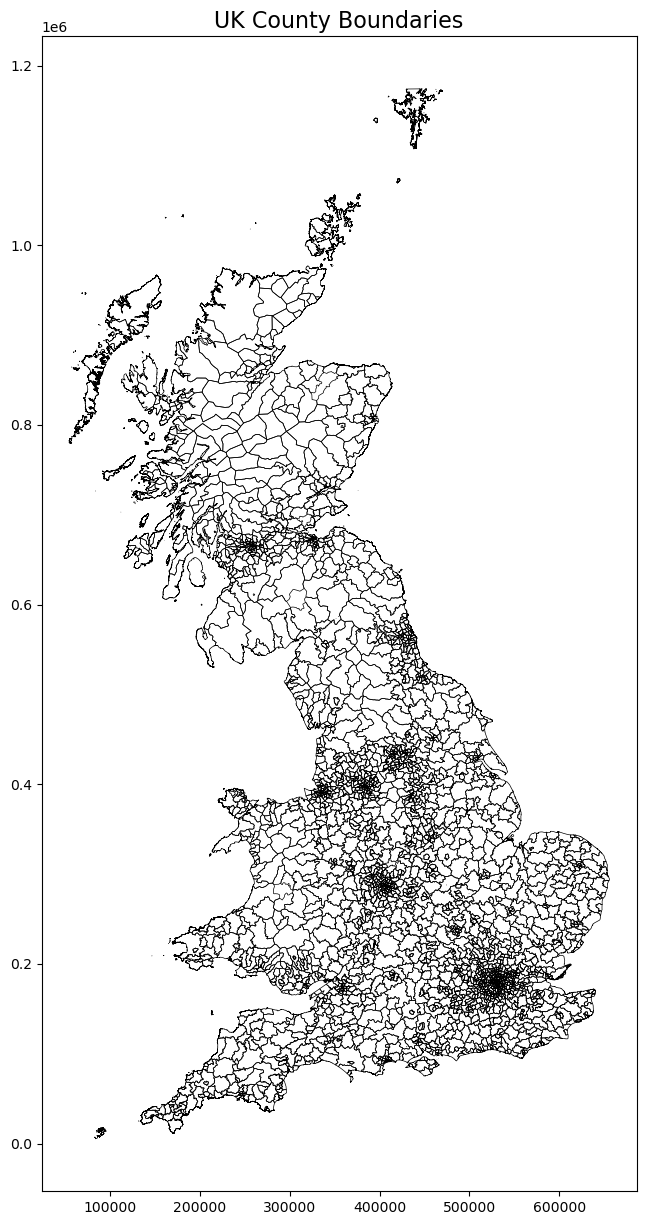

In [41]:
fig, ax = plt.subplots(figsize=(12, 15))
postcode_gdf.plot(
    ax=ax,
    edgecolor='black',
    facecolor='none',
    linewidth=0.5,
)
ax.set_title('UK County Boundaries', fontsize=16)
plt.show()

In [42]:
np.random.seed(42)  # For reproducible results
sample_data = pd.DataFrame({
    'postcode': postcode_gdf['postcode'],
    'value': np.random.randint(1, 100, size=len(postcode_gdf))
})

# Join the data to the geodataframe
choropleth_gdf = postcode_gdf.merge(sample_data, on='postcode')

# Create a custom colormap (blue to red)
colors = ['#2c7bb6', '#abd9e9', '#ffffbf', '#fdae61', '#d7191c']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)


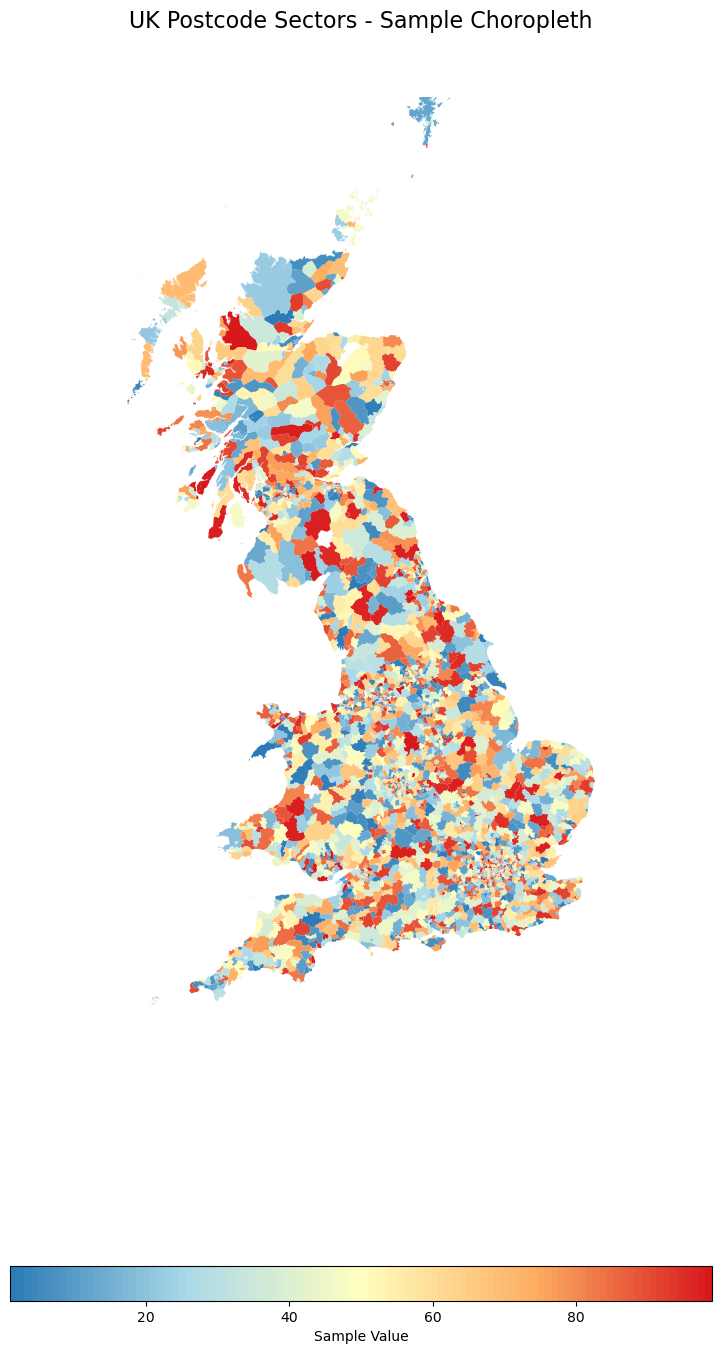

In [44]:
fig, ax = plt.subplots(figsize=(12, 15))

# Plot the choropleth
choropleth_gdf.plot(
    column='value',
    cmap=cmap,
    linewidth=0.0,
    ax=ax,
    edgecolor='#333333',
    legend=True,
    legend_kwds={'label': "Sample Value",
                 'orientation': "horizontal",
                 'shrink': 0.6}
)

# Add a title and adjust layout
ax.set_title('UK Postcode Sectors - Sample Choropleth', fontsize=16)
ax.set_axis_off()
plt.tight_layout()

# Show the plot
plt.show()